In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [3]:
#That thing recognise faces coordinates on any picture
face_model = cv2.CascadeClassifier('Data and Dependencies/haarcascade/haarcascade_frontalface_default.xml')

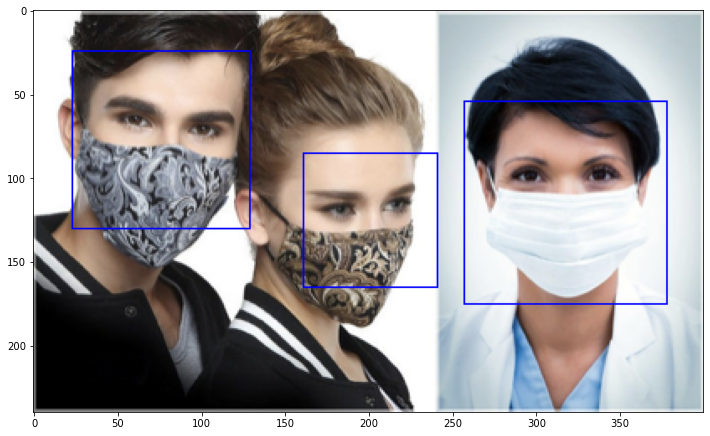

In [5]:
#trying it out on a sample image
img = cv2.imread('Data and Dependencies/archive/maksssksksss81.png')
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [6]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [7]:
#Load train and test set
train_dir = 'Data and Dependencies/Face Mask Dataset/Train'
test_dir = 'Data and Dependencies/Face Mask Dataset/Test'
val_dir = 'Data and Dependencies/Face Mask Dataset/Validation'

In [8]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [9]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16386     
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [10]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [11]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

C:\Users\thibo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
9/9 [==============================] - 9s 896ms/step - loss: 0.7358 - accuracy: 0.5908
Epoch 2/20
9/9 [==============================] - 8s 887ms/step - loss: 0.3312 - accuracy: 0.8564
Epoch 3/20
9/9 [==============================] - 8s 911ms/step - loss: 0.1634 - accuracy: 0.9507
Epoch 4/20
9/9 [==============================] - 8s 918ms/step - loss: 0.1647 - accuracy: 0.9341
Epoch 5/20
9/9 [==============================] - 9s 966ms/step - loss: 0.1532 - accuracy: 0.9434
Epoch 6/20
9/9 [==============================] - 9s 948ms/step - loss: 0.1497 - accuracy: 0.9512
Epoch 7/20
9/9 [==============================] - 9s 975ms/step - loss: 0.1208 - accuracy: 0.9624
Epoch 8/20
9/9 [==============================] - 9s 977ms/step - loss: 0.0733 - accuracy: 0.9887
Epoch 9/20
9/9 [==============================] - 9s 957ms/step - loss: 0.1012 - accuracy: 0.9629
Epoch 10/20
9/9 [==============================] - 9s 1s/step - loss: 0.0954 - accuracy: 0.9722
Epoch 11/20
9/9 [=====

In [12]:
model.evaluate_generator(test_generator)
#98% accuracy on test data.

C:\Users\thibo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.08466411381959915, 0.9700000286102295]

In [14]:
#model.save('masknet.h5')

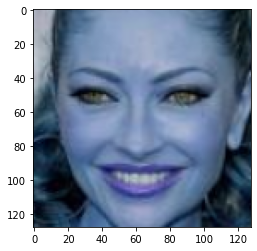

In [15]:
sample_mask_img = cv2.imread('Data and Dependencies/Face Mask Dataset/Test/WithoutMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [19]:
result = model.predict(sample_mask_img)

In [20]:
print(result)

[[0.07381007 0.9248459 ]]


In [21]:
mask_label = {0:'MASK',1:'NO MASK'}
color_label = {0:(0,255,0),1:(255,0,0)}

In [23]:
print(mask_label[result.argmax()])

NO MASK


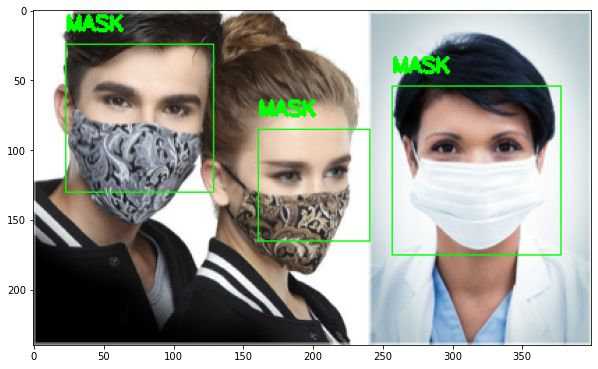

In [24]:
img = cv2.imread('Data and Dependencies/archive/maksssksksss81.png')
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(128,128))
    crop = np.reshape(crop,[1,128,128,3])/255.0
    mask_result = model.predict(crop)
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color_label[mask_result.argmax()],2)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),color_label[mask_result.argmax()],1)
plt.figure(figsize=(10,10))
plt.imshow(new_img)